In [1]:
import sys
sys.dont_write_bytecode = True
import numpy as np
from testing_suite import *
from parameters import *
from algorithm import *
import functions as fcn
import time
import matplotlib.pyplot as plt
import math
import itertools
import random as rand
import pandas as pd
import os
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

f = 1

In [2]:
# create dataframe containing all data to be evaluated

if False:
    master_df = None
    cnt = 1
    directory = "C:\\Users\\stijn Hennissen\\Jupyter Notebooks\\Nast Thesis\\Testing suite\\suit_result_files\\"

    for filename in os.listdir(directory)[:]:
        if filename.endswith(".csv"):
            file_df = pd.read_csv(directory+filename, index_col=0)
            if cnt == 1:
                master_df = file_df.tail(1).copy()
                master_df.index = [0]
            else:
                master_df = master_df.append(file_df.tail(1).copy(), ignore_index=True)
            master_df.reset_index()
            i = master_df.index[-1]
            m_timer_main = np.mean(np.array([l[1:-1].split() for l in file_df['timer_main']]).astype(float), axis=0)
            for j in range(0, m_timer_main.size):
                master_df.loc[i, 'timer_main_'+str(j+1)] = m_timer_main[j]
            master_df.loc[i, ['timer_iter', 'timerest_iter', 'delta_time']] = np.mean(np.array(file_df[['timer_iter', 'timerest_iter', 'delta_time']].values), axis=0)
            
            cnt += 1
    master_df.drop('timer_main', axis=1, inplace=True)
    master_df.to_csv('master_df.csv', index=False)


In [3]:
data = pd.read_csv("C:\\Users\\stijn Hennissen\\Jupyter Notebooks\\Nast Thesis\\Testing suite\\master_df.csv")
data.drop(data[data['min_score'] <= 0].index, inplace=True)
data.reset_index()

,index,min_score,mean_score,std_score,max_score,timer_iter,timerest_iter,elapsed_time,delta_time,best_p,...,CP_fitness_code,CP_selection_code,CP_iteration_cap,CP_mutation_code,CP_parameter_code,timer_main_1,timer_main_2,timer_main_3,timer_main_4,timer_main_5
0,0,3.857849e+03,3.857849e+03,0.000000e+00,3.857849e+03,0.000309,0.000003,0.313260,0.000313,[[ 0.13144966 0.59076107 0.51682287 0.59076...,...,abs,roulette,1000,gaussian,C,0.000094,0.000060,0.000027,0.000004,0.000120
1,1,4.382083e+03,4.382083e+03,0.000000e+00,4.382083e+03,0.000314,0.000003,0.318642,0.000319,[[-5.23924770e-01 -5.23924770e-01 -5.23924770e...,...,abs,roulette,1000,gaussian,C,0.000090,0.000058,0.000027,0.000020,0.000116
2,2,7.149281e+03,7.149281e+03,0.000000e+00,7.149281e+03,0.000325,0.000003,0.329942,0.000330,[[-5.23924770e-01 -5.23924770e-01 -5.23924770e...,...,abs,roulette,1000,gaussian,C,0.000092,0.000059,0.000028,0.000020,0.000123
3,3,1.786579e+00,1.822128e+00,6.157131e-02,1.928772e+00,0.000312,0.000003,0.316114,0.000316,[[-5.23812751e-01 -4.59966337e-01 -3.39445638e...,...,abs,roulette,1000,gaussian,C,0.000092,0.000060,0.000028,0.000004,0.000124
4,4,3.815897e+02,3.844453e+02,1.648706e+00,3.854056e+02,0.000311,0.000003,0.315637,0.000316,[[ 0.59076107 0.4297551 0.59076107 0.64945...,...,abs,roulette,1000,gaussian,C,0.000092,0.000059,0.000028,0.000008,0.000121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,1194,2.659095e+02,9.154794e+02,2.515773e+03,1.065903e+04,0.002514,0.000003,2.518594,0.002519,[[-9.57359001e-01 -9.57359001e-01 -9.57359001e...,...,abs,roulette,1000,gaussian,C,0.000293,0.000625,0.000150,0.000061,0.001382
1192,1195,1.378383e+18,1.705619e+18,4.860939e+17,2.449265e+18,0.002561,0.000004,2.566184,0.002566,[[ 5.96861782e-01 5.96861782e-01 5.96861782e...,...,abs,roulette,1000,gaussian,C,0.000307,0.000630,0.000151,0.000076,0.001394
1193,1196,1.540816e+13,2.029180e+13,1.891426e+13,9.354641e+13,0.002566,0.000004,2.571046,0.002571,[[ 9.13427069e-01 9.13427069e-01 9.13427069e...,...,abs,roulette,1000,gaussian,C,0.000303,0.000630,0.000152,0.000080,0.001398
1194,1197,2.988453e+02,2.988453e+02,0.000000e+00,2.988453e+02,0.002574,0.000004,2.579004,0.002579,[[-8.51207270e-01 -8.51207270e-01 -8.51207270e...,...,abs,roulette,1000,gaussian,C,0.000304,0.000631,0.000156,0.000075,0.001405


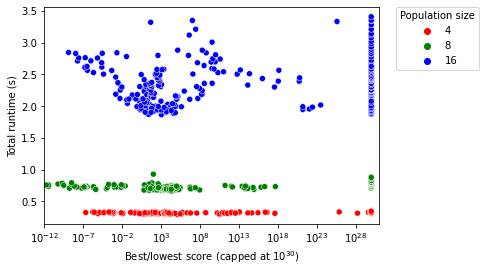

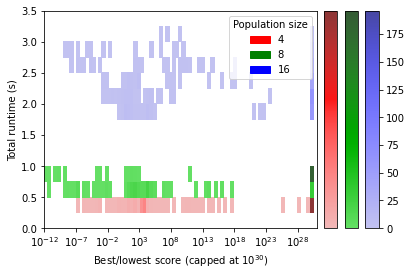

In [9]:
# Plot score against time
plt.figure(f)
g1 = sns.scatterplot(
    data = data,
    x = 'min_score',
    y = 'elapsed_time',
    hue = 'MP_population_size',
    palette = ['red', 'green', 'blue']
)
plt.xscale('log')
plt.xlim(1e-12,1e31)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Population size')
plt.xlabel('Best/lowest score (capped at $10^{30}$)')
plt.ylabel('Total runtime (s)')
plt.show()
f += 1

plt.figure(f)
g3 = sns.histplot(
    data = data.loc[data['min_score'] > 0],
    x = 'min_score',
    y = 'elapsed_time',
    hue = 'MP_population_size',
    palette = ['red', 'green', 'blue'],
    log_scale=[True, False],
    bins = [np.linspace(-12, 31, num=86), np.arange(0, 3.5, 0.25)],
)
plt.xlim(1e-12,1e31)
plt.ylim(0, 3.5)
g3.legend_.set_title('Population size')
divider = make_axes_locatable(g3)
divider_kwargs = dict(position="right", size="5%", pad=0.1)
cbar_3_1 = plt.colorbar(g3.collections[0], ax=g3, cax=divider.append_axes(**divider_kwargs))
cbar_3_2 = plt.colorbar(g3.collections[1], ax=g3, cax=divider.append_axes(**divider_kwargs))
cbar_3_3 = plt.colorbar(g3.collections[2], ax=g3, cax=divider.append_axes(**divider_kwargs))
cbar_3_2.set_ticks([])
cbar_3_1.set_ticks([])
g3.set(xlabel = 'Best/lowest score (capped at $10^{30}$)', ylabel = 'Total runtime (s)')
plt.show()
f += 1

<Figure size 432x288 with 0 Axes>

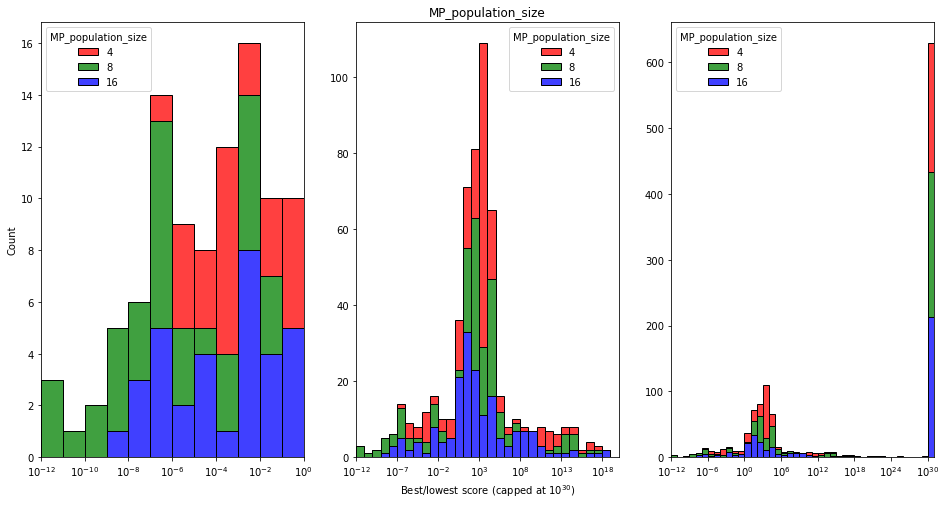

<Figure size 432x288 with 0 Axes>

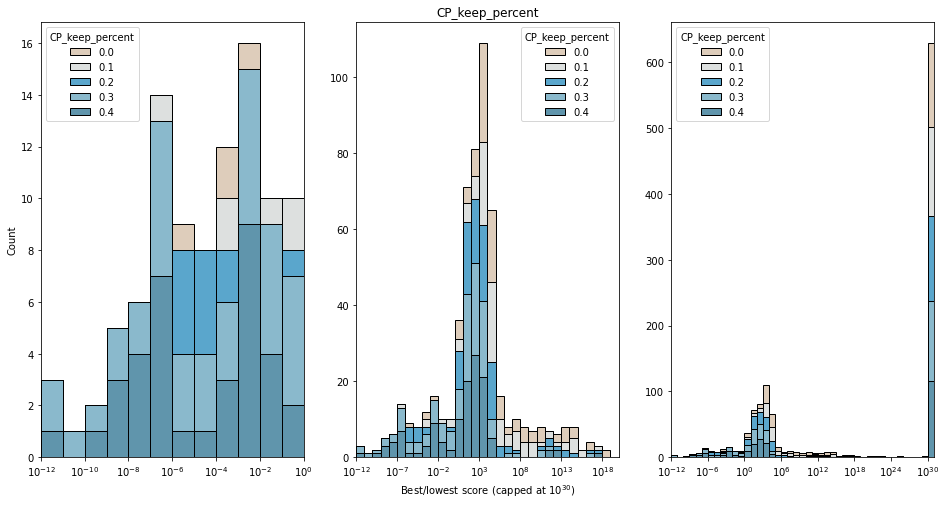

<Figure size 432x288 with 0 Axes>

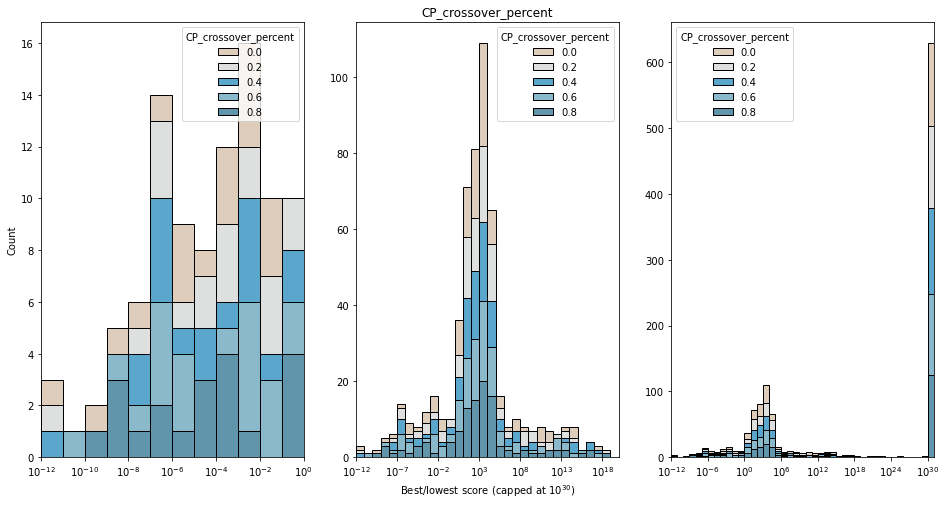

<Figure size 432x288 with 0 Axes>

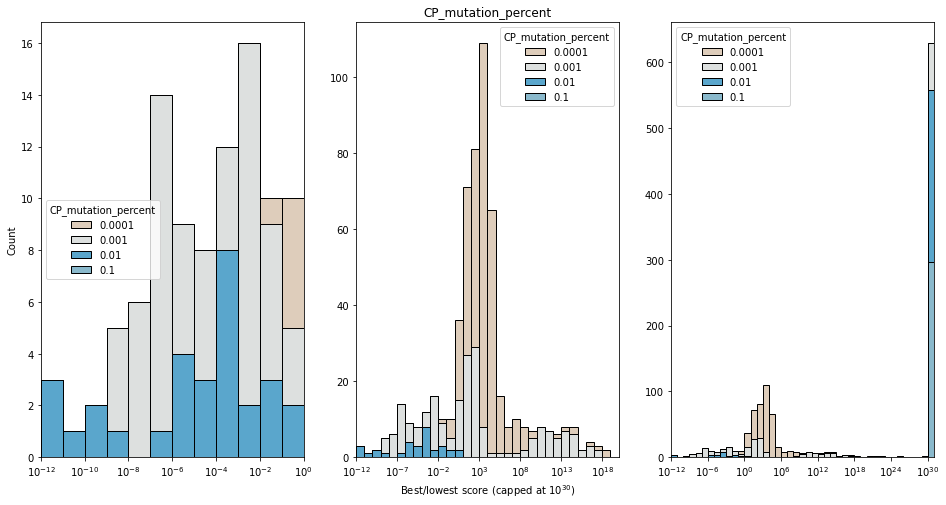

<Figure size 432x288 with 0 Axes>

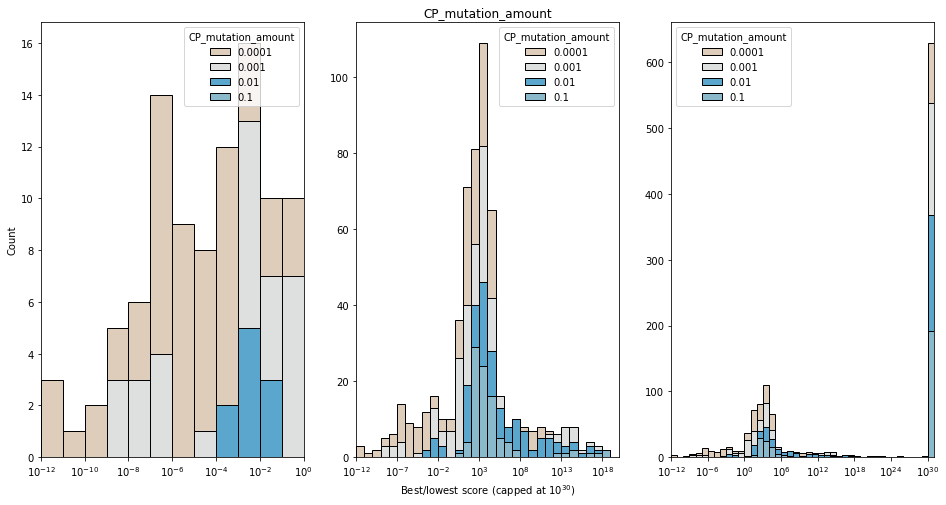

In [10]:
# Plot hists of scores

def plot_hist_scores(column, f, palette):
    plt.figure(f)
    fig, axs = plt.subplots(ncols=3, figsize=(16, 8))

    g20 = sns.histplot(
        data = data.loc[data['min_score'] > 0],
        x = 'min_score',
        hue = column,
        log_scale = True,
        multiple = "stack",
        bins = np.linspace(-12, 0, num=13),
        ax = axs[0],
        palette = palette
    )
    axs[0].set_xlim([1e-12,1])

    g21 = sns.histplot(
        data = data.loc[data['min_score'] > 0],
        x = 'min_score',
        hue = column,
        log_scale = True,
        multiple = "stack",
        bins = np.linspace(-12, 20, num=33),
        ax = axs[1],
        palette = palette
    )
    axs[1].set_xlim([1e-12,1e20])

    g22 = sns.histplot(
        data = data.loc[data['min_score'] > 0],
        x = 'min_score',
        hue = column,
        log_scale = True,
        multiple = "stack",
        bins = np.linspace(-12, 31, num=44),
        ax = axs[2],
        palette = palette
    )
    axs[2].set_xlim([1e-12,1e31])

    axs[0].set_xlabel('')
    axs[1].set_xlabel('Best/lowest score (capped at $10^{30}$)')
    axs[2].set_xlabel('')
    axs[0].set_ylabel('Count')
    axs[1].set_ylabel('')
    axs[2].set_ylabel('')
    
    axs[1].set_title(column)
    plt.show()
    return f + 1

palette = ['#d3bda5', '#d2d6d5', '#2388bc', '#63a2bc', '#2b7291', '#0c6391', '#003e6c']
f = plot_hist_scores('MP_population_size', f, ['red', 'green', 'blue'])
f = plot_hist_scores('CP_keep_percent', f, palette[:5])
f = plot_hist_scores('CP_crossover_percent', f, palette[:5])
f = plot_hist_scores('CP_mutation_percent', f, palette[:4])
f = plot_hist_scores('CP_mutation_amount', f, palette[:4])

In [11]:
# Find Paretro optima

def find_pareto_optima_2d(data, c1, c2):
    pareto_df = pd.DataFrame(columns=data.columns)
    for i, row in data.iterrows():
        is_dominated = False
        is_duplicate = False
        for j, other_row in data.iterrows():
            if i == j:
                continue
            # Check if the other solution dominates the current solution
            if (other_row[c1] < row[c1] and other_row[c2] < row[c2]):
                # The other solution dominates the current solution and hence row cannot be added to pareto set.
                is_dominated = True
                break
            # Check if the other solution is a duplicate
            if (other_row[c1] == row[c1] and other_row[c2] == row[c2]):
                is_duplicate = True
                break

        if not is_dominated:
            # The current solution is Pareto-optimal
            row_df = pd.DataFrame([row])
            pareto_df = pd.concat([pareto_df, row_df], ignore_index=True).drop_duplicates()

    return pareto_df

pareto_front = find_pareto_optima_2d(data, 'min_score', 'elapsed_time')
pareto_front = pareto_front.sort_values(by='min_score')

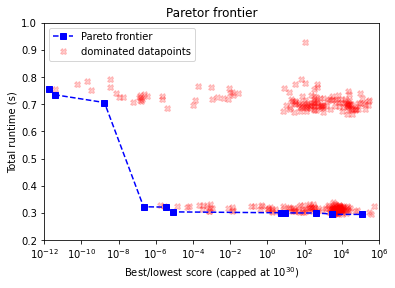

In [35]:
# plot pareto front

plt.figure(f)
plt.plot(
    pareto_front['min_score'].values,
    pareto_front['elapsed_time'].values,
    's--',
    c='b',
    label = 'Pareto frontier',
    zorder = 10
)
plt.plot(
    data['min_score'].values,
    data['elapsed_time'].values,
    'X',
    c='r',
    label = 'dominated datapoints',
    alpha = .2,
    zorder = 5
)
plt.xscale('log')
plt.xlim(1e-12, 1e6)
plt.ylim(0.2, 1)
plt.legend()
plt.xlabel('Best/lowest score (capped at $10^{30}$)')
plt.ylabel('Total runtime (s)')
plt.title('Paretor frontier')
plt.show()
f += 1